In [1]:
using DelimitedFiles

# nacteni dat ze souboru
pot_fig = readdlm("pot_fig_data.dat")  
E_fig = readdlm("E_fig_data.dat")

192×2 Array{Float64,2}:
 -0.000561595  1748.51
 -0.000558176  1712.59
 -0.000554757  1676.66
 -0.000551338  1640.74
 -0.000547919  1604.81
 -0.0005445    1568.89
 -0.000541081  1532.96
 -0.000537662  1497.04
 -0.000534008  1470.55
 -0.000530353  1445.55
 -0.000526699  1420.55
 -0.000523045  1395.55
 -0.00051939   1370.55
  ⋮                   
  0.000523045  1395.55
  0.000526699  1420.55
  0.000530353  1445.55
  0.000534008  1470.55
  0.000537662  1497.04
  0.000541081  1532.96
  0.0005445    1568.89
  0.000547919  1604.81
  0.000551338  1640.74
  0.000554757  1676.66
  0.000558176  1712.59
  0.000561595  1748.51

In [2]:
# import packagu pro ploceni
using PyPlot
using PyCall
using LaTeXStrings

# latex fonty
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
rcParams["font.size"] = 14
rcParams["mathtext.fontset"] = "cm"
rcParams["mathtext.rm"] = "serif"
rcParams["text.usetex"] = "false";

Vytvoreni hezkeho grafu dle potreb

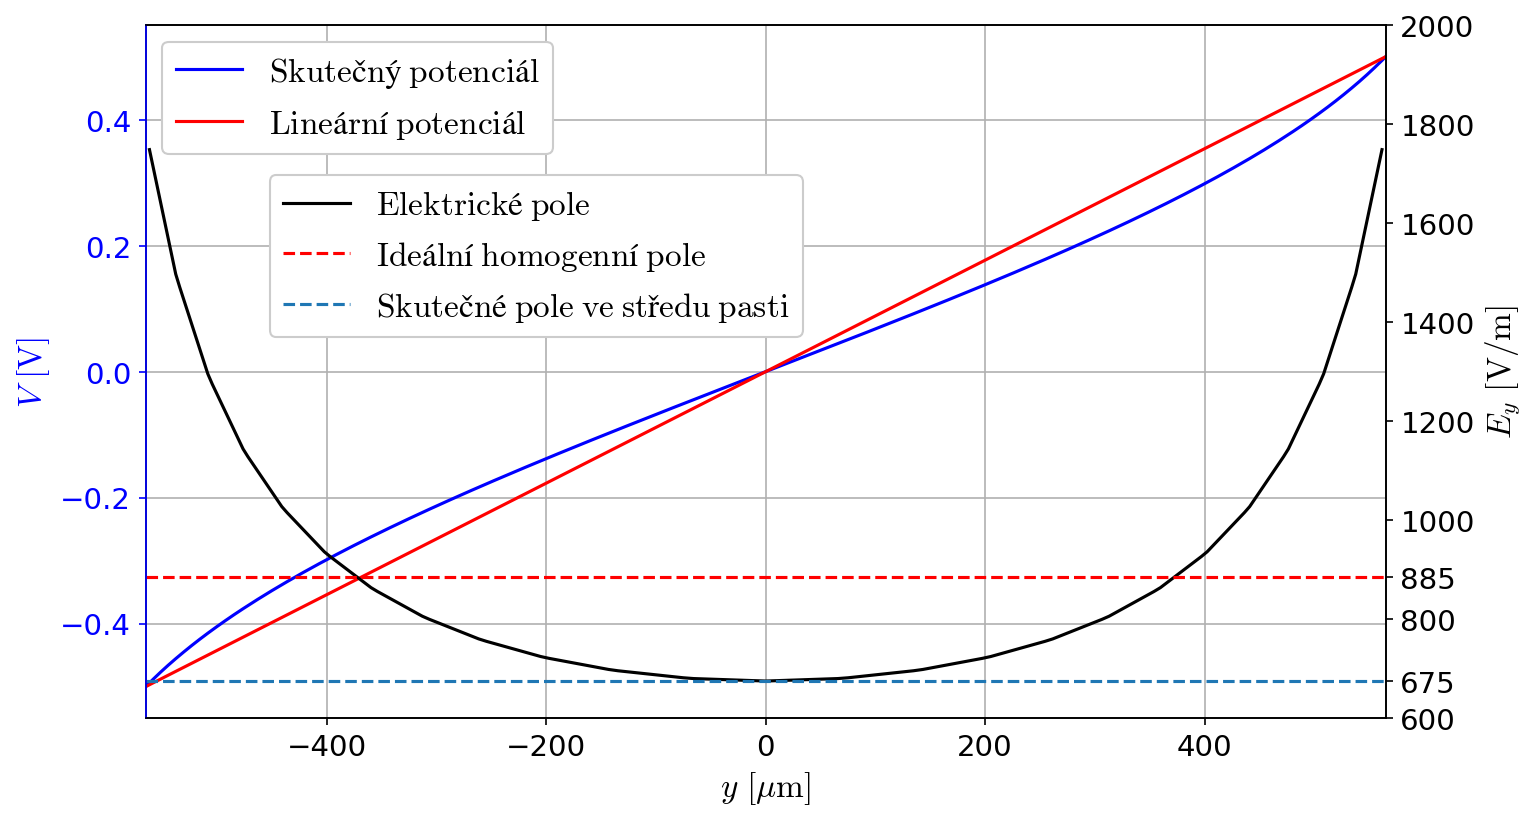

In [13]:
my_dpi = 150
siz = 100
sizex = 16*siz
sizey = 9*siz

# idealni el_pole bude dane jako smernice delta U / delta x
# tedy 1V / 1.13 mm
E_ideal = 1/1.13e-3

# idealni potencial prislusejici k ideal poli
y_axis = pot_fig[:,1] 
pot_ideal = E_ideal * y_axis

figure(figsize=(sizex/my_dpi, sizey/my_dpi), dpi=my_dpi)
x=gca()

line1 = x.plot(pot_fig[:,1]*1e6, pot_fig[:,2], color="blue", label=L"\rm{Skutečný \; potenciál}")
line5 = x.plot(y_axis*1e6, pot_ideal, color="red", label=L"\rm{Lineární \; potenciál}")

x.grid()


x.set(xlim=(-0.565*1e3, 0.565*1e3) )
x.set_xlabel(L"y \,\, \rm{[\mu m]}", fontsize=16)
x.set_ylabel(L"V \, \, \rm{[V]}", fontsize=16, color="blue")
x.tick_params(axis="y", colors="blue")

x.legend(loc=2, framealpha=1, fontsize=16)

x2 = x.twinx()
line2 = x2.plot(E_fig[:,1]*1e6, E_fig[:,2], color="black", label=L"\rm{Elektrické \; pole}")
x2.set_ylabel(L"E_y \,\, \rm{[V/m]}", fontsize=16)
x2.spines["left"].set_color("blue")
x2.spines["right"].set_color("black")
x2.tick_params(axis="y", colors="black")

line3 = x2.axhline(E_ideal, color="red", linestyle="--", label=L"\rm{Ideální \; homogenní \; pole}")
line4 = x2.axhline(minimum(E_fig[:,2]), linestyle="--", label=L"\rm{Skutečné \; pole \; ve \; středu \; pasti}") 

# pridani ticku s minimem E pole
yt = x2.get_yticks() 
yt=push!(yt,minimum(E_fig[:,2]))
yt= push!(yt, E_ideal)
x2.set_yticks(yt)

#x2.legend(loc=0, framealpha=1, fontsize=16, bbox_to_anchor=(0, 0))
x2.legend(loc=(0.1,0.55), framealpha=1, fontsize=16)

savefig("/home/dan/diplomka_winfiles/Julia_vypocty_diplomka/julia_plots/dipole_alpha.svg", bbox_inches="tight")